# Practical Machine Learning for Physicists
## Week 2 Exercise - Part 1
## Deadline Monday 9th November at 12pm (Noon)

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to both Moodle and CoCalc. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


In [1]:
#the following code is pasted from [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense


#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

#Useful for debugging problems
print(tf.__version__)

print(np.__version__)

#not from [1]:

from IPython.display import clear_output

mnist = keras.datasets.mnist   #load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #obtain test and training images

2.6.0
1.19.5


# Task 1:

In [2]:
#Normalise train_image and test_image pixel values:
train_images=train_images/255.0
test_images=test_images/255.0

#### Make Convolutional Nueral Network with 1 Convolutional Layer:

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)), #convolutional layer & input layer of 28x28 
    keras.layers.MaxPooling2D((2, 2)), #pooling layer with 2x2 downsampling kernal
    keras.layers.Flatten(),   #flatten nueral network layers 
    keras.layers.Dense(30,activation='relu'), #hidden layer of 30 nuerons
    keras.layers.Dropout(0.4),   #dropout layer to prevent overfitting [2],[3]
    keras.layers.Dense(10)   #output layer of 10 nuerons
])

#summarise parameter, ouput shape and layers:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                141990    
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 142,580
Trainable params: 142,580
Non-trainable params: 0
________________________________________________

#### Fit nueral network to MNIST images:

In [4]:
train_images = train_images.reshape(len(train_images),28,28,1) #reshape train images to fit into convulutional layer
test_images = test_images.reshape(len(test_images),28,28,1) #reshape test images to fit into convulutional layer

#from sequential model to compile model:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#fit the model to training data and test data then ouput loss and accuracy:
history = model.fit(train_images, train_labels, epochs=10, batch_size=100, validation_data=(test_images, test_labels))

Epoch 1/10
600/600 [==============================] - 24s 39ms/step - loss: 0.6047 - accuracy: 0.8052 - val_loss: 0.1474 - val_accuracy: 0.9585
Epoch 2/10
600/600 [==============================] - 19s 32ms/step - loss: 0.3028 - accuracy: 0.9037 - val_loss: 0.0959 - val_accuracy: 0.9706
Epoch 3/10
600/600 [==============================] - 20s 33ms/step - loss: 0.2401 - accuracy: 0.9233 - val_loss: 0.0885 - val_accuracy: 0.9726
Epoch 4/10
600/600 [==============================] - 19s 32ms/step - loss: 0.2147 - accuracy: 0.9317 - val_loss: 0.0732 - val_accuracy: 0.9752
Epoch 5/10
600/600 [==============================] - 18s 30ms/step - loss: 0.1917 - accuracy: 0.9379 - val_loss: 0.0685 - val_accuracy: 0.9777
Epoch 6/10
600/600 [==============================] - 18s 29ms/step - loss: 0.1785 - accuracy: 0.9414 - val_loss: 0.0662 - val_accuracy: 0.9771
Epoch 7/10
600/600 [==============================] - 18s 29ms/step - loss: 0.1645 - accuracy: 0.9459 - val_loss: 0.0649 - val_accuracy:

#### Plot test accuracy and train accuracy to compare:

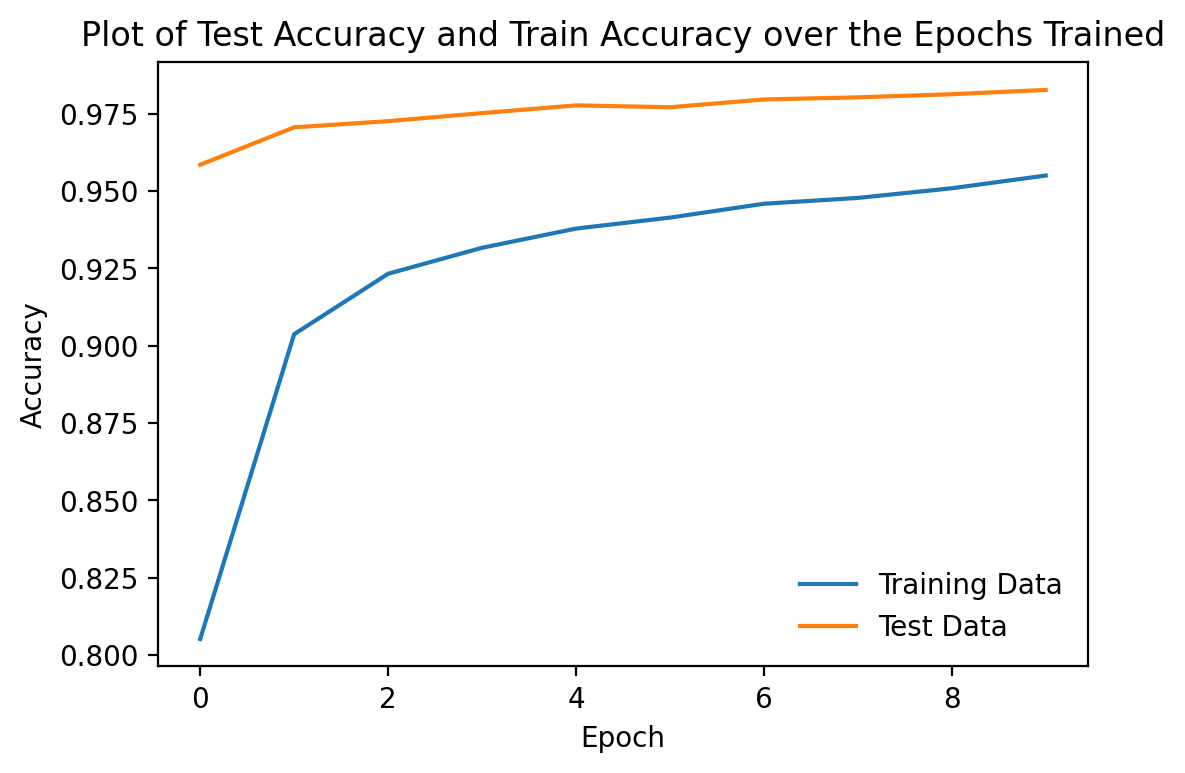

In [5]:
plt.figure()
plt.plot(history.history['accuracy'], label = "Training Data") #training accuracy
plt.plot(history.history['val_accuracy'], label = "Test Data") #test accuracy
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.title("Plot of Test Accuracy and Train Accuracy over the Epochs Trained")
plt.show()

#### Comments:

The test accuracy is >95% and the training accuracy is ~95% with one convultional layer in our nueral network. This could be improved by adding noise to the MNIST data set, more steps, bigger batch size etc. However, these will decreas network efficiency as more computing power will be required. 

# Task 2:

#### Make Convolutional Nueral Network with 3 Convolutional Layers:

In [10]:
model2 = keras.Sequential([
    keras.layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28,28,1)), #convolutional layer & input layer of 28x28
    keras.layers.MaxPooling2D((2, 2)), #pooling layer with 2x2 downsampling kernal
    keras.layers.Conv2D(56, (3, 3), activation='relu'), #2nd convolutional layer with 56 3x3 kernals
    keras.layers.MaxPooling2D((2, 2)), #pooling layer with 2x2 downsampling kernal 
    keras.layers.Conv2D(56, (3, 3), activation='relu'), # 3rd convolutional layer with 56 3x3 kernals
    keras.layers.Flatten(), #flatten nueral network layers 
    keras.layers.Dense(30,activation='relu'), #hidden layer of 30 nuerons
    keras.layers.Dropout(0.4),   #dropout layer to prevent overfitting [2],[3]
    keras.layers.Dense(10)   #output layer of 10 nuerons
])  

#summarise parameter, ouput shape and layers:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 56)        14168     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 56)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 56)          28280     
_________________________________________________________________
flatten_3 (Flatten)          (None, 504)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 30)               

#### Fit nueral network to MNIST images:

In [7]:
#from sequential model to compile model:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#fit the model to training data and test data then ouput loss and accuracy:
history = model2.fit(train_images, train_labels, epochs=10, batch_size=100, validation_data=(test_images, test_labels))

Epoch 1/10
600/600 [==============================] - 37s 61ms/step - loss: 0.5022 - accuracy: 0.8390 - val_loss: 0.0643 - val_accuracy: 0.9808
Epoch 2/10
600/600 [==============================] - 40s 67ms/step - loss: 0.1733 - accuracy: 0.9464 - val_loss: 0.0490 - val_accuracy: 0.9855
Epoch 3/10
600/600 [==============================] - 42s 70ms/step - loss: 0.1242 - accuracy: 0.9615 - val_loss: 0.0400 - val_accuracy: 0.9877
Epoch 4/10
600/600 [==============================] - 39s 66ms/step - loss: 0.0958 - accuracy: 0.9711 - val_loss: 0.0407 - val_accuracy: 0.9875
Epoch 5/10
600/600 [==============================] - 44s 74ms/step - loss: 0.0808 - accuracy: 0.9756 - val_loss: 0.0425 - val_accuracy: 0.9869
Epoch 6/10
600/600 [==============================] - 48s 80ms/step - loss: 0.0733 - accuracy: 0.9786 - val_loss: 0.0383 - val_accuracy: 0.9893
Epoch 7/10
600/600 [==============================] - 43s 72ms/step - loss: 0.0620 - accuracy: 0.9814 - val_loss: 0.0253 - val_accuracy:

#### Plot test accuracy and train accuracy to compare:

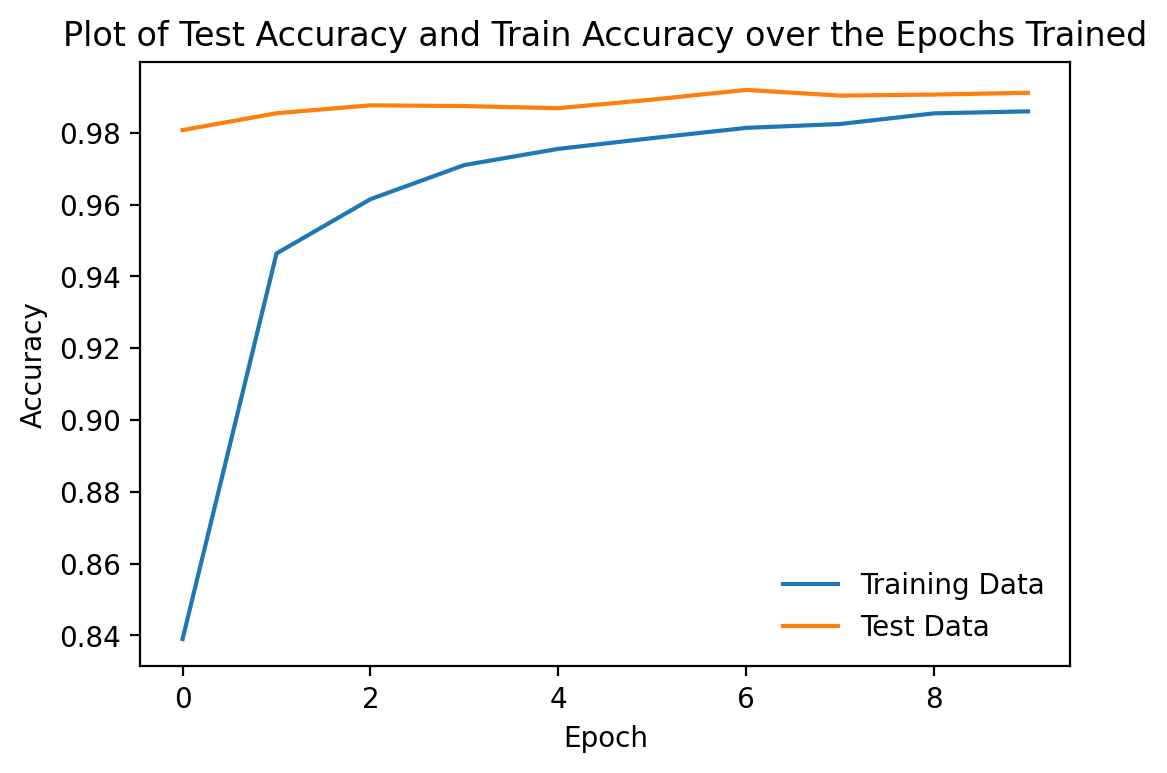

In [8]:
plt.figure()
plt.plot(history.history['accuracy'], label = "Training Data") #training accuracy
plt.plot(history.history['val_accuracy'], label = "Test Data") #test accuracy
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Plot of Test Accuracy and Train Accuracy over the Epochs Trained")
plt.legend()
plt.show()

#### Comments:

By adding two extra convolutional layers, we have drastically improved accuracy of both the test and training images. The final training accuracy was >95% (specifically, 98.6%) and the final test accuracy was >98% (specifically, 99.12%). This shows that we adding more convolutional layers will improve accuracy. 

### Conclusion:

It is clear that adding more convolutional layers will improve accuracy. Another benefit of more convolutional layers, aside from improving network performance, is decreasing the amount of data the network is required to proccess. Therefore, adding more convolutional layers will decrease the number of parameters; for the one convolutional layer there were 142,580 parameters where as there were only 58,188 parameters. Therefore, adding more convolutional layers will decrease computer power usage and thus increase efficiency. 

# References:

[1]Nichol. R 2021. "Week4_ConvolutionalNeuralNetwork.ipynb". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=6793#section-10 [accessed 2nd November October 2021] 

[2]Sagar. A 2019. "5 Techniques to Prevent Overfitting in Neural Networks". [Online]. KD Nuggets. Available from https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html [accessed 2nd November October 2021] 

[3] "Dropout layer". [Online] Keras.io. Available from https://keras.io/api/layers/regularization_layers/dropout/. [accessed 2nd November October 2021] 